<a href="https://colab.research.google.com/github/Pritam-Mondal18/Machine-Learning-yt/blob/main/Function_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Function Transformer: log Transformer, squre Transformer, squre root Transformer
#2) Power Transformer: box-cox,yeo-johnson
#3) Quantile Transformer

In [71]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('train.csv',usecols=['Fare','Sex','Age','Survived'])

In [4]:
df.sample(3)

,Survived,Sex,Age,Fare
216,1,female,27.0,7.9250
470,0,male,NaN,7.2500
680,0,female,NaN,8.1375


In [19]:
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [20]:
df.isnull().sum()

,0
Survived,0
Sex,0
Age,0
Fare,0


In [21]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [22]:
df.head(2)

,Survived,Sex,Age,Fare
0,0,1,22.0,7.2500
1,1,0,38.0,71.2833


In [23]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

/tmp/ipython-input-3768798574.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


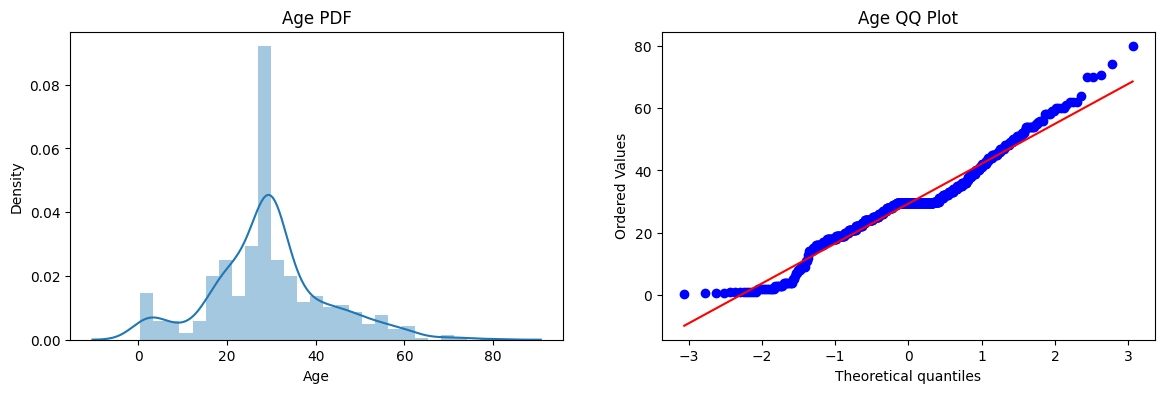

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

/tmp/ipython-input-245005333.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


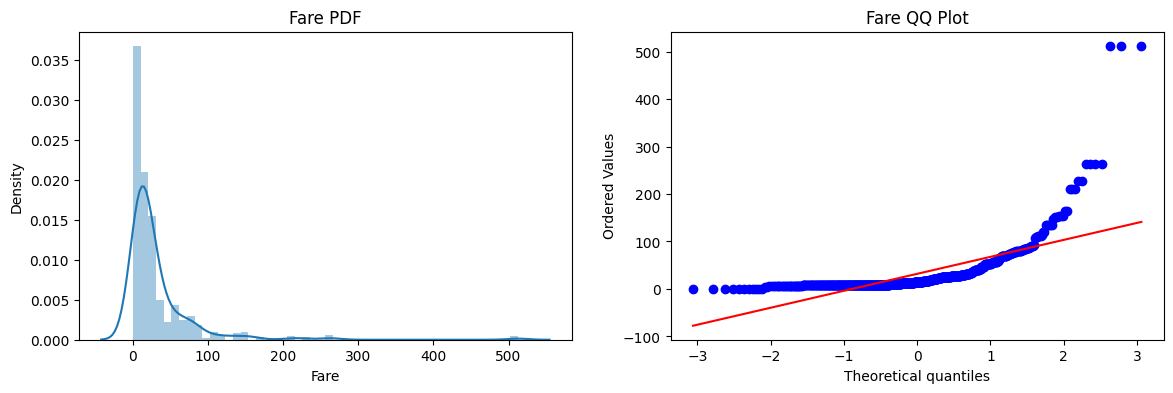

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [36]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [45]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy of LR",accuracy_score(y_test,y_pred))
print("Accuracy of DT",accuracy_score(y_test,y_pred2))

Accuracy of LR 0.7835820895522388
Accuracy of DT 0.746268656716418


In [49]:
# log function: log function used because the fare pdf is skwed in right side.
trf = FunctionTransformer(func=np.log1p)

In [50]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [51]:
clft = LogisticRegression()
clft2 = DecisionTreeClassifier()

In [53]:
clft.fit(X_train,y_train)
clft2.fit(X_train,y_train)

y_predict_trf = clft.predict(X_test)
y_predict_trf2 = clft2.predict(X_test)

print("Accuracy of LR",accuracy_score(y_test,y_predict_trf))
print("Accuracy of DT",accuracy_score(y_test,y_predict_trf2))

Accuracy of LR 0.7835820895522388
Accuracy of DT 0.753731343283582


In [56]:
# Cross Validation
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,cv=10,scoring='accuracy')))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,cv=10,scoring='accuracy')))

LR 0.784481897627965
DT 0.7474906367041199


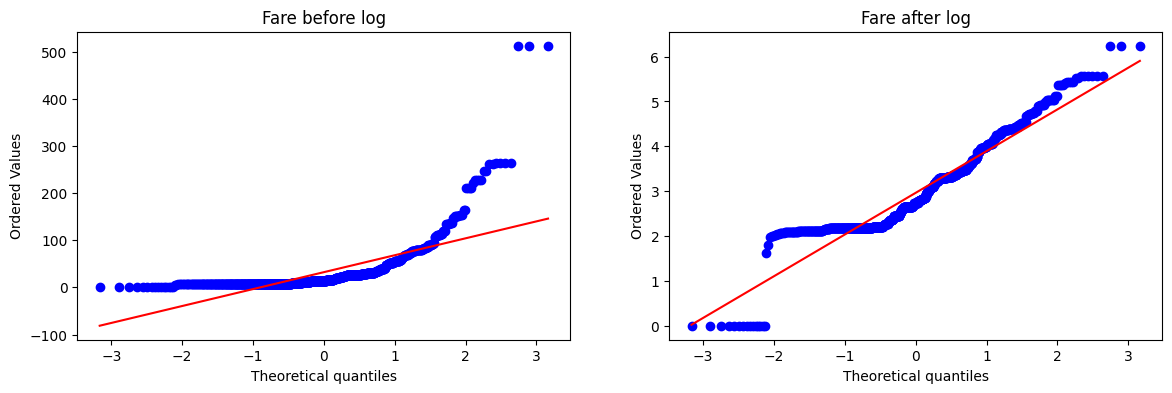

In [66]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X['Fare'],dist='norm',plot=plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare after log')

plt.show()

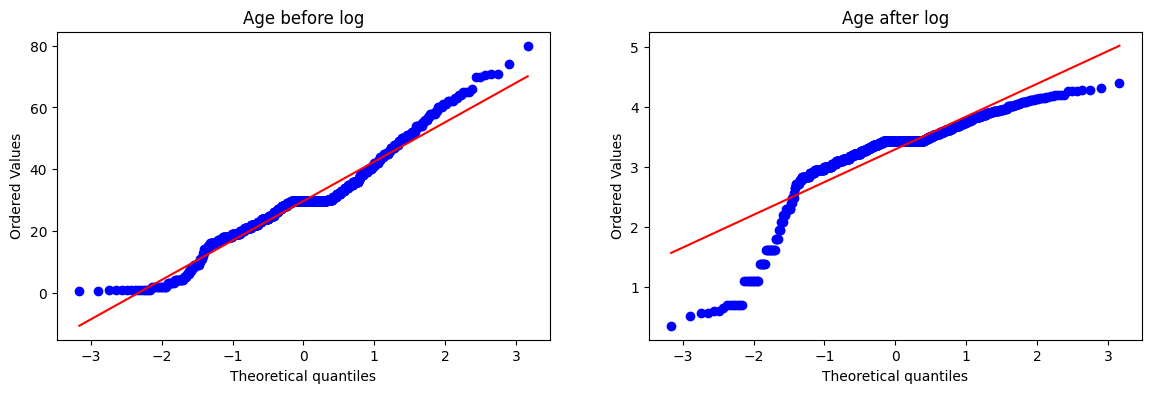

In [67]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X['Age'],dist='norm',plot=plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_transformed['Age'],dist='norm',plot=plt)
plt.title('Age after log')

plt.show()

In [75]:
trfnew = ColumnTransformer([('Log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformednew = trfnew.fit_transform(X_train)
X_test_transformednew = trfnew.transform(X_test)

In [76]:
clfnew = LogisticRegression()
clfnew2 = DecisionTreeClassifier()

In [79]:
clfnew.fit(X_train_transformednew,y_train)
clfnew2.fit(X_train_transformednew,y_train)

y_predict_new = clfnew.predict(X_test_transformednew)
y_predict_new2 = clfnew2.predict(X_test_transformednew)

print("Accuracy of LR",accuracy_score(y_test,y_predict_new))
print("Accuracy of DT",accuracy_score(y_test,y_predict_new2))

Accuracy of LR 0.7910447761194029
Accuracy of DT 0.7425373134328358


In [81]:
# cross validation
X_transformed2 = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,cv=10,scoring='accuracy')))


LR 0.784481897627965


In [85]:
# Reciprocal Function, r^2 function

def apply_transform(transform):
    X = df.drop(['Survived'], axis=1) # Corrected to include 'Fare' column
    y = df['Survived'] # Changed iloc to direct column access for y, assuming 'Survived' is the target

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.786729088639201


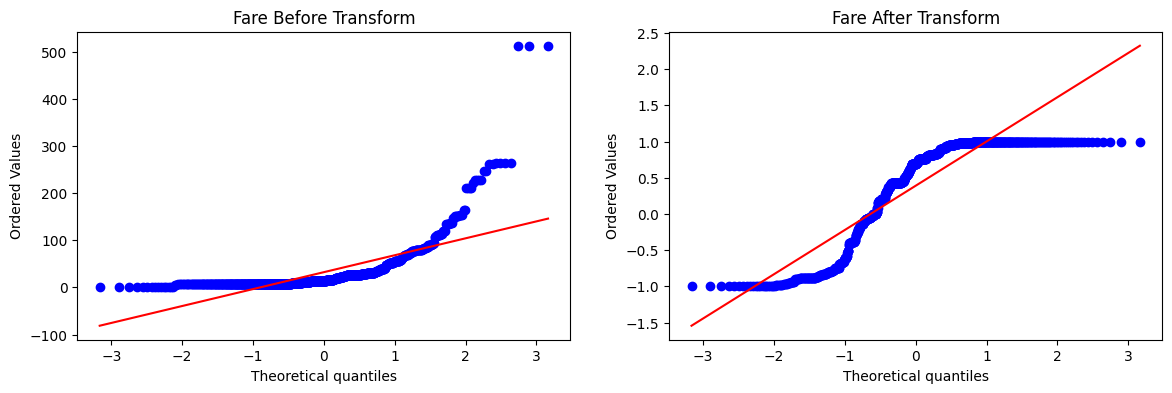

In [98]:
apply_transform(np.sin)